In [2]:
#customer churn is number of customers leaving 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis = 'columns', inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges != ' ']

In [10]:
df1.shape


(7032, 21)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df1[df1.Churn=='No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [14]:
df1[df1.Churn=='No'].tenure


0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

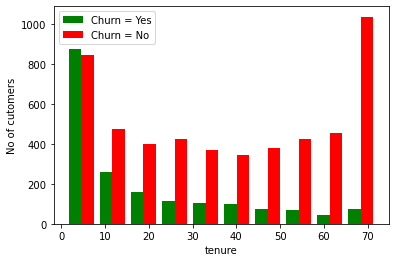

In [19]:
plt.xlabel("tenure")
plt.ylabel("No of cutomers")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()


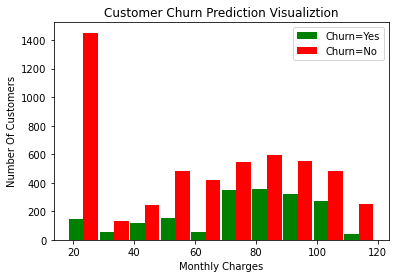

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
#getting unique values of each column
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [22]:
print_unique_col_values(df1)


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
#replacing no internet service by no using repalce function in pandas
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
#you can provide dictionary in replace function

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [28]:
#one hot encoding of colums
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3990,6986-IXNDM,0,0,0,0,14,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
671,3088-FVYWK,0,0,1,1,53,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5822,9112-WSNPU,1,1,0,0,35,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2892,2668-TZSPS,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
281,8229-MYEJZ,1,0,0,0,10,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [33]:
df2.dtypes


customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [34]:
df.drop('customerID', axis = 'columns', inplace = True)
df1.drop('customerID', axis = 'columns', inplace = True)
df2.drop('customerID', axis = 'columns', inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [36]:
#scaling the values to 0 to 1
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
58,1,0,1,1,0.464789,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1293,0,0,1,1,0.929577,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3615,0,1,1,1,0.352113,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1066,0,0,1,0,0.647887,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1636,1,0,0,0,0.661972,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5911,0,0,1,0,0.084507,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6230,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2452,0,1,0,0,0.197183,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4885,0,1,1,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
6450,1,0,1,1,0.366197,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [39]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
X_train.shape


(5625, 26)

In [45]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=250)

Epoch 1/250
176/176 [==============================] - 1s 1ms/step - loss: 0.5114 - accuracy: 0.7497
Epoch 2/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.7932
Epoch 3/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.7995
Epoch 4/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8034
Epoch 5/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8064
Epoch 6/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8092
Epoch 7/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8107
Epoch 8/250
176/176 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8096
Epoch 9/250
176/176 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8107
Epoch 10/250
176/176 [==============================] - 1s 3ms/step - loss: 0.3997 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8453
Epoch 82/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8492
Epoch 83/250
176/176 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8492
Epoch 84/250
176/176 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8460
Epoch 85/250
176/176 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8457
Epoch 86/250
176/176 [==============================] - 1s 3ms/step - loss: 0.3238 - accuracy: 0.8468
Epoch 87/250
176/176 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8508
Epoch 88/250
176/176 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8510
Epoch 89/250
176/176 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8498
Epoch 90/250
176/176 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8692
Epoch 161/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8695
Epoch 162/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8720
Epoch 163/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8722
Epoch 164/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8722
Epoch 165/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.8743
Epoch 166/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8720
Epoch 167/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8732
Epoch 168/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8729
Epoch 169/250
176/176 [==============================] - 0s 3ms/step - loss: 0.2777 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8837
Epoch 240/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8795
Epoch 241/250
176/176 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.8816
Epoch 242/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8830
Epoch 243/250
176/176 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8834
Epoch 244/250
176/176 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.8866
Epoch 245/250
176/176 [==============================] - 1s 3ms/step - loss: 0.2501 - accuracy: 0.8873
Epoch 246/250
176/176 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8834
Epoch 247/250
176/176 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8825
Epoch 248/250
176/176 [==============================] - 1s 3ms/step - loss: 0.2522 - a

Epoch 1/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8361
Epoch 2/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8411
Epoch 3/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8396
Epoch 4/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8352
Epoch 5/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8379
Epoch 6/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8375
Epoch 7/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8386
Epoch 8/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8368
Epoch 9/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8386
Epoch 10/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3397 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8521
Epoch 82/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8492
Epoch 83/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8500
Epoch 84/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8494
Epoch 85/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8480
Epoch 86/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8512
Epoch 87/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8489
Epoch 88/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8521
Epoch 89/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8482
Epoch 90/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 

176/176 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8590
Epoch 161/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8594
Epoch 162/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8606
Epoch 163/250
176/176 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8606
Epoch 164/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8585
Epoch 165/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8603
Epoch 166/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8604
Epoch 167/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8576
Epoch 168/250
176/176 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8608
Epoch 169/250
176/176 [==============================] - 0s 3ms/step - loss: 0.2997 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8636
Epoch 240/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8676
Epoch 241/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.8661
Epoch 242/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8686
Epoch 243/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8672
Epoch 244/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8644
Epoch 245/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8686
Epoch 246/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8644
Epoch 247/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.8686
Epoch 248/250
176/176 [==============================] - 0s 1ms/step - loss: 0.2887 - a

In [46]:
model.evaluate(X_test, y_test)


44/44 [==============================] - 0s 918us/step - loss: 0.8525 - accuracy: 0.7342


[0.8525112271308899, 0.7341862320899963]

In [47]:
yp = model.predict(X_test)
yp[:5]

array([[2.6126289e-01],
       [8.1065029e-02],
       [7.5075268e-06],
       [6.0177362e-01],
       [1.7484075e-01]], dtype=float32)

In [48]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
y_pred[:10]


[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [50]:
y_test[:10]



2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       999
           1       0.55      0.50      0.52       408

    accuracy                           0.73      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.73      0.73      0.73      1407



Text(69.0, 0.5, 'Truth')

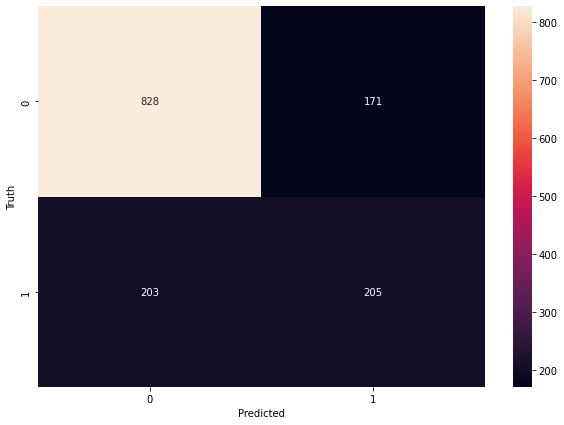

In [52]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
round((828+205)/(828+171+203+205), 2)

0.73